<a href="https://colab.research.google.com/github/gousesada/Face-Recognition-Pipeline-With-Python-Using-ML/blob/main/Face_Recognition_Pipeline_With_Python_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=50)

In [3]:
 faces.data

array([[0.3150327 , 0.33202615, 0.39869282, ..., 0.5254902 , 0.606536  ,
        0.46535948],
       [0.11895425, 0.22352941, 0.31633988, ..., 0.303268  , 0.40784314,
        0.52026147],
       [0.3647059 , 0.25490198, 0.19738562, ..., 0.5189543 , 0.18039216,
        0.3124183 ],
       ...,
       [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
        0.5908497 ],
       [0.50980395, 0.6013072 , 0.654902  , ..., 0.9019608 , 0.8823529 ,
        0.8901961 ],
       [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
        0.29150328]], dtype=float32)

In [4]:
faces.data.shape

(1560, 2914)

In [5]:
faces.images[0].shape

(62, 47)

In [6]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [7]:
faces.target_names.size

12

In [8]:
import numpy as np

In [9]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
faces.target_names[0]

'Ariel Sharon'

In [11]:
import matplotlib.pyplot as plt

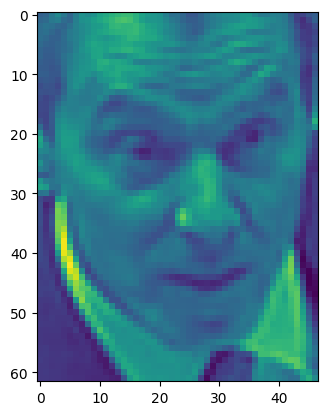

In [12]:
plt.imshow(faces.images[0])

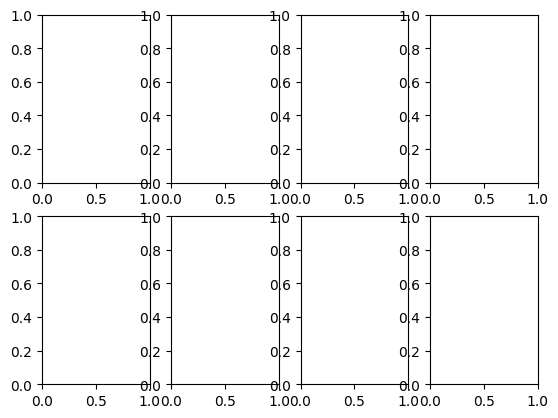

In [13]:
fig , ax = plt.subplots(2,4)

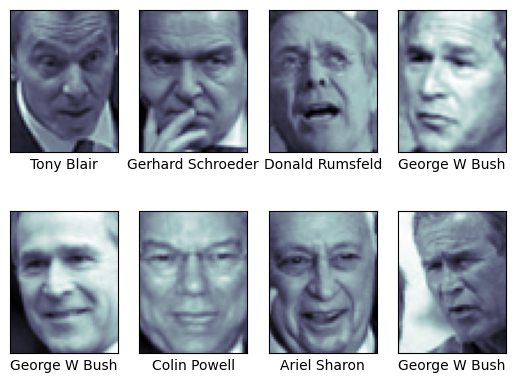

In [14]:
fig , ax = plt.subplots(2,4)
for idx, axidx in enumerate(ax.flat):
  axidx.imshow(faces.images[idx],cmap='bone')
  axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [15]:
 from sklearn.svm import SVC
 from sklearn.decomposition import PCA
 from sklearn.pipeline import make_pipeline

In [16]:
pcaModel = PCA(n_components=150,whiten=True)
svmModel = SVC(kernel='rbf',class_weight='balanced')
mdl = make_pipeline(pcaModel,svmModel)

In [17]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,test_size=0.2)

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid = GridSearchCV(mdl,param_grid)

In [19]:
grid.fit(Xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [20]:
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [21]:
mdl = grid.best_estimator_

In [22]:
y_pred = mdl.predict(Xtest)

In [23]:
ytest

array([ 3,  3,  1, 11,  3,  3, 11,  9,  3,  5,  3,  4,  3,  4,  3,  3,  4,
        1,  5,  1, 11,  3,  2, 11,  3,  9,  2,  7,  3,  4, 10,  3,  5,  1,
        3,  1,  5,  2,  5,  1,  3,  9, 11, 11,  1,  1,  1,  1,  1,  9, 11,
        0,  1,  9, 10,  1,  0,  2,  3,  9,  0,  3,  7,  8,  2,  1, 11, 11,
        1,  4,  3,  3,  3,  4,  3,  3, 11,  3,  1,  0,  7,  0,  3,  0, 11,
        3,  5,  9, 11,  4,  2,  9,  3,  3,  3, 10,  1,  8,  4,  4,  2,  3,
        4, 10,  3,  4,  3,  3,  3,  3,  1,  7,  2,  3, 11, 11,  3,  3,  6,
        5,  3,  3,  3,  3,  1,  1,  3,  9,  3,  3, 11,  6,  1,  4,  9,  3,
        6,  4,  3,  1,  4,  6,  4,  5,  3,  1,  6,  3,  1,  5,  3,  4,  2,
        7, 11,  1,  0,  2, 10,  0,  1,  4,  3,  7,  1, 11, 11,  2,  3,  3,
        5,  3,  0,  3,  3,  1, 11,  6,  3, 11,  8,  3,  3,  2,  4, 11,  3,
        3,  3,  3,  1,  1,  6,  7,  3,  5,  1,  3,  3, 11, 11,  2,  3, 11,
        9,  8,  1,  9,  1,  2,  1,  1, 11,  1,  6,  5,  1, 10,  3,  5,  3,
        1,  4,  3, 11, 10

In [24]:
y_pred

array([ 1,  3,  1, 11,  3,  3,  3,  9,  3,  5,  3,  4,  3,  4,  3,  3,  4,
        1,  5,  1, 11,  3,  1, 11,  3,  9,  2,  7,  3,  4, 10,  3,  1,  1,
        1,  1,  5,  2,  5,  1,  3,  1,  4, 11,  1,  1,  1,  0,  1,  9, 11,
        0,  1,  9,  5,  5,  1,  2,  3,  3,  0,  3, 11,  8,  2,  1, 11, 11,
        1,  4,  3,  3,  3,  3,  3,  3, 11,  1,  1,  0,  7,  0,  6,  1, 11,
        3,  3,  9,  3,  4,  2,  9,  3,  3,  3, 10,  1,  8,  6,  4,  3,  3,
        4, 10,  3,  4,  3,  3,  1,  3,  1,  7,  2,  3, 11, 11,  3,  3,  3,
        5,  3,  3,  3,  1,  1,  1,  3, 11,  1,  3, 11,  6,  1,  5,  9,  3,
        1,  3,  3,  1,  4, 11,  4,  5,  3,  1,  3,  3,  1,  5,  3,  4,  2,
        7, 11,  1,  0,  2,  3,  3,  1,  4,  3,  0,  1,  4,  3,  2,  3,  3,
        1,  3,  0,  8,  3,  1, 11,  6,  3, 11,  8,  3,  3,  2,  4, 11,  3,
        2,  3,  3,  1,  1, 11,  0,  1,  5,  1,  3,  3, 11, 11,  2,  3, 11,
        6, 11,  1,  9,  2,  2,  1,  1, 11,  1,  3,  5,  1, 10,  3,  5,  1,
        1,  4,  3, 11, 10

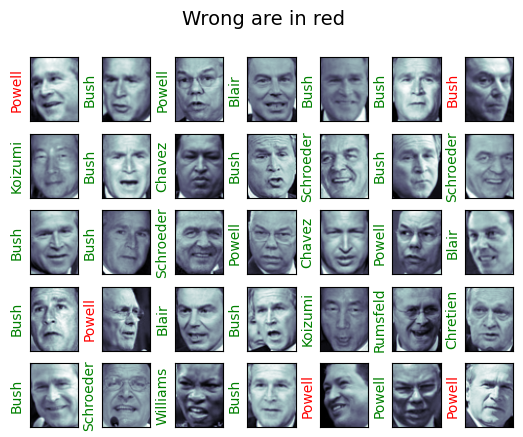

In [25]:
fig, ax = plt.subplots(5,7)
for idx, axidx in enumerate(ax.flat):
  axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
  axidx.set(xticks=[],yticks=[])
  axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
  fig.suptitle('Wrong are in red',size=14)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.73      0.70        11
     Colin Powell       0.71      0.93      0.81        43
  Donald Rumsfeld       0.64      0.89      0.74        18
    George W Bush       0.88      0.84      0.86       109
Gerhard Schroeder       0.91      0.83      0.87        24
      Hugo Chavez       0.78      0.78      0.78        18
   Jacques Chirac       0.50      0.40      0.44        10
    Jean Chretien       0.83      0.45      0.59        11
    John Ashcroft       0.88      0.78      0.82         9
Junichiro Koizumi       1.00      0.73      0.85        15
  Serena Williams       1.00      0.70      0.82        10
       Tony Blair       0.82      0.82      0.82        34

         accuracy                           0.81       312
        macro avg       0.80      0.74      0.76       312
     weighted avg       0.82      0.81      0.81       312



In [28]:
import seaborn as sns

Text(113.92222222222219, 0.5, 'predicted label')

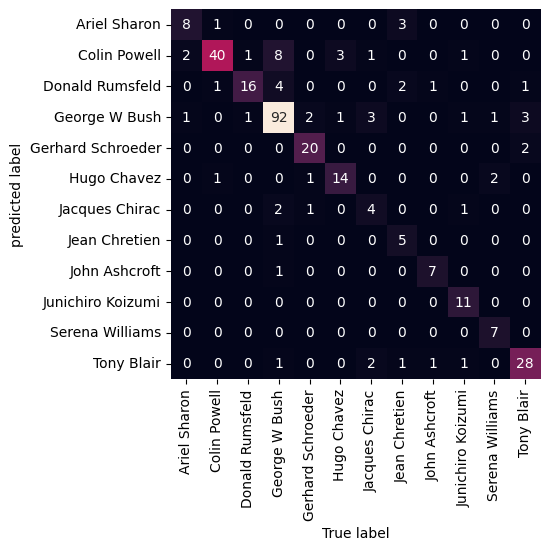

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("predicted label")